In [1]:
#Downgrading to a previous Qiskit version to avoid plotting issues w/ plt
#!pip install qiskit==0.16.1

In [2]:
import qiskit
import matplotlib as plt

In [3]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.1',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.5.0',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.16.1'}

In [4]:
from qiskit import IBMQ

The below command set's credentials to this laptop, so we can run our code on IBMs Quantum Computers. 

In [5]:
IBMQ.save_account('f0ba292d8c08bcc5f662f7781c7ad26f72b0aea4c98a623d14835bcc7fa58190700c41b24b09c6df952e955ec8f0be1865aacc9b6a0bda4c80a0fd4125259a54')

Credentials already present. Set overwrite=True to overwrite.


In [6]:
IBMQ.load_account() # Check access status 

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

<h1> <u>Index</u> </h1>

[Tutorial 2: Measurements](#Tutorial2)<br>
[Tutorial 3: Quantum Teleportation Algorithm](#Tutorial3)

We can use the link to IBM's Quantum Computers to send our quantum circuits to be run there.

# Tutorial 1: Hello World (Entanglement Circuit)

In [7]:
from qiskit import *

In [8]:
# Building a 2 qubit quantum circuit
qr = QuantumRegister(2) # building a two qubit quantum register
cr = ClassicalRegister(2) # two classical bit classical register to take measurements from these quantum bits  

We can build a circuit using the above qubits & classical bits

In [9]:
circuit = QuantumCircuit(qr, cr)

Next we will learn to draw out circuit
***
Apply the following command

In [10]:
%matplotlib inline
circuit.draw()

q0_0: |0>
         
q0_1: |0>
         
 c0_0: 0 
         
 c0_1: 0

Inorder to create entanglement we have to first apply a Hadamard Gate onto the first qubit.

In [11]:
circuit.h(qr[0])

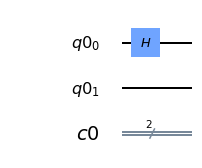

In [12]:
circuit.draw(output='mpl')

We are going to create a two-qubit operation called **Controlled X**. <br>
This operation is like an if-statement <ul>
    <li> 1<sup>st</sup> qubit is the control
    <li> 2<sup>nd</sup> qubit is the target

In [13]:
circuit.cx(qr[0],qr[1])

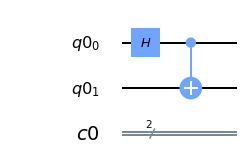

In [14]:
circuit.draw(output='mpl')

With these two operations we can now create <b>Entanglement</b>. <br>
Next we measure the qubits and store that info in the classical bits

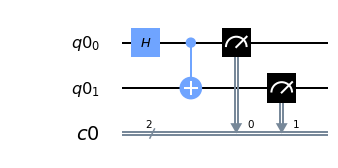

In [15]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

### Simulating the Quantum Circuit on classical computer

In [16]:
#Use "Aer" component to simulate Quantum Circuits on Local Machine
simulator = Aer.get_backend('qasm_simulator')

#### QASM = Quantum Assembly Language

In [17]:
exe=execute(circuit, backend = simulator)
result = exe.result()

In [18]:
from qiskit.tools.visualization import plot_histogram
# To visualize our results ^

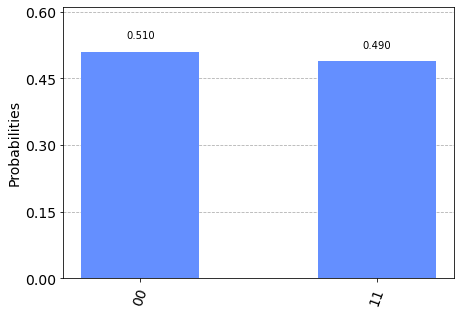

In [19]:
plot_histogram(result.get_counts(circuit))

<p>We don't get an exact 50%-50% split in the 00 & 11 state probability distribution as we've only run a limited number of shots on the simulation instead of an infinite number of shots.</p> <br> 
<p>Now that we know our simualation produces good results we can send our circuits to the IBM Quantum Computer </p>

In [20]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [21]:
provider = IBMQ.get_provider('ibm-q') # The provider will be an actual
                                      # quantum computer   

In [23]:
qcomp = provider.get_backend('ibmq_16_melbourne')
## These names are just generic, the device isn't actually in Melbourne

In [24]:
job = execute(circuit, backend=qcomp)

Because we are using a public device we can use the **job monitor** to check out queue number 

In [25]:
from qiskit.tools.monitor import job_monitor 
job_monitor(job)

Job Status: job has successfully run


In [26]:
result = job.result()

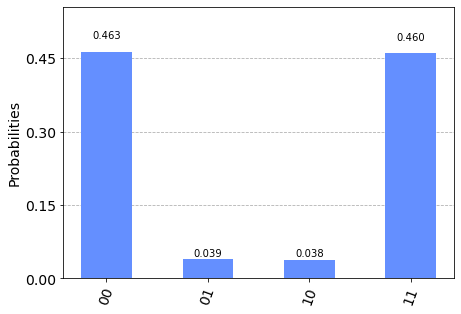

In [27]:
plot_histogram(result.get_counts(circuit))

### Conclusion :  <br>
The results we get from the "Actual Quantum Computer" are different then the "idealized" version present in the simulator. This is due to small quantum errors. The goal is to improve real-world Quantum Computers to the point where such small errors become statistically insignificant

# Tutorial 2 : Measurements
<a id='Tutorial2'></a>

In [28]:
from qiskit import *

In [29]:
from qiskit.tools.visualization import plot_bloch_multivector

In [30]:
circuit = QuantumCircuit(1,1) # with 1 Qubit & 1 Classical Bit
circuit.x(0) # X Gate applied to the zeroth qubit
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()

In [31]:
print(statevector)

[0.+0.j 1.+0.j]


The returned <b>statevector</b> corresponds to the Pauli-X inverse of the input state of ket(0) ie; (1+0j, 0+0j). Hence we get (0+0j, 1+0j)

[0.+0.j 1.+0.j]


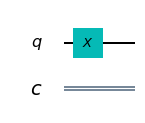

In [32]:
print(statevector)
circuit.draw(output="mpl")

### Bloch Sphere Representation

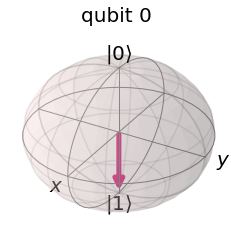

In [33]:
plot_bloch_multivector(statevector)

People often describe operations on Quantum States as rotations on the sphere.

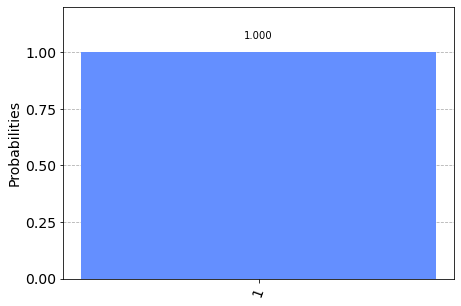

In [35]:
circuit.measure([0],[0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [39]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unitary = result.get_unitary()
print(unitary)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


### Measurements

In [39]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unitary = result.get_unitary()
print(unitary)
# Prints out the Pauli-X Unitary matrix

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


### Four ways of talking about a Quantum Gate
<ol> <li> Bra-ket notation </li>
    <li> Matrix notation </li>
    <li> Bloch Sphere </li>
    <li> Measurement </li>

# Tutorial 3: Quantum Teleportation Algorithm
<a id='Tutorial3'></a>

Quantum Teleportation is the transfer of Quantum States from one qubit to another. Unlike traditional computers, we cannot copy information in Quantum Computers without also destorying that information. To work around this we make use of entanglement.

In [49]:
from qiskit import *

In [50]:
circuit = QuantumCircuit(3,3) # 3 qubits + 3 classical bits

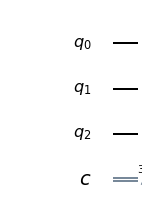

In [51]:
%matplotlib inline
circuit.draw(output='mpl') # matplotlib draw option =>'mpl'

Take $q_{0}$ state and transfer it to $q_{2}$. $q_{1}$ is the resource we use to perform this process.

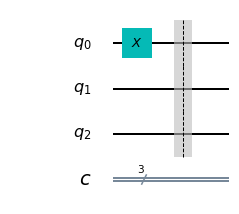

In [52]:
circuit.x(0) #try h(0) and see qubit 2 take 0 ~50% of the time & 1 ~50%
circuit.barrier()
circuit.draw(output='mpl')

Create entanglement between $q_{1}$ and $q_{2}$

In [53]:
circuit.h(1)
circuit.cx(1,2)

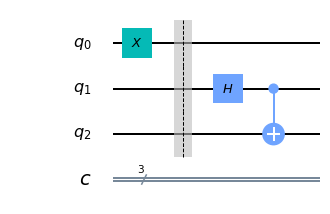

In [54]:
circuit.draw(output='mpl')

Now $q_{1}$ \& $q_{2}$ are entangled.

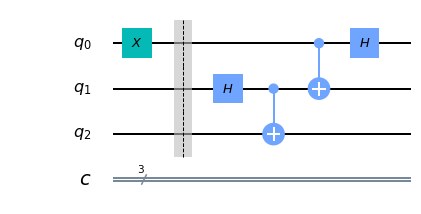

In [55]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

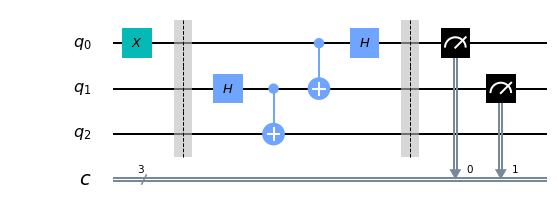

In [56]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [57]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)

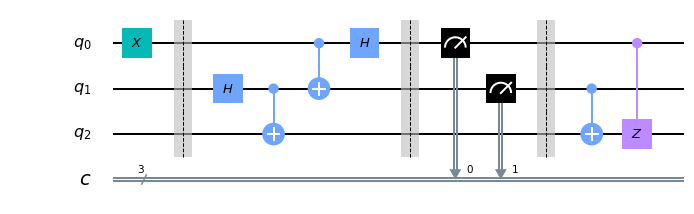

In [58]:
circuit.draw(output='mpl')

<center><h3>This is the Quantum Teleportation Protocol <h3></center>
State-1 at $q_{0}$ has now been teleported to $q_{2}$
    

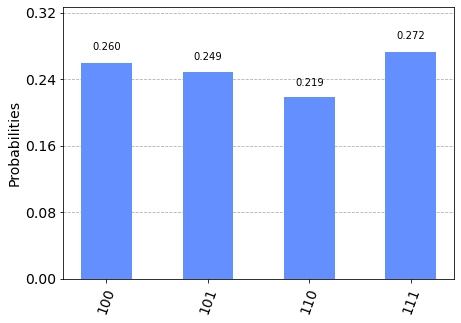

In [59]:
circuit.measure(2,2) # take q2 measure put in classical bit 2
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

The 100, 101, 110, & 111 values are read as ($c_{2},c_{1},c_{0}$)

In [88]:
print(counts)
#We can observe that all the value sets of (c2,c1,c0) start with c2=1

{'100': 266, '101': 256, '110': 251, '111': 251}


## We perform a Numerical check on the circuit
At the end of checking the circuit with input (000) we find that infact all the $q_{2}$ values correspond to <b>1</b>

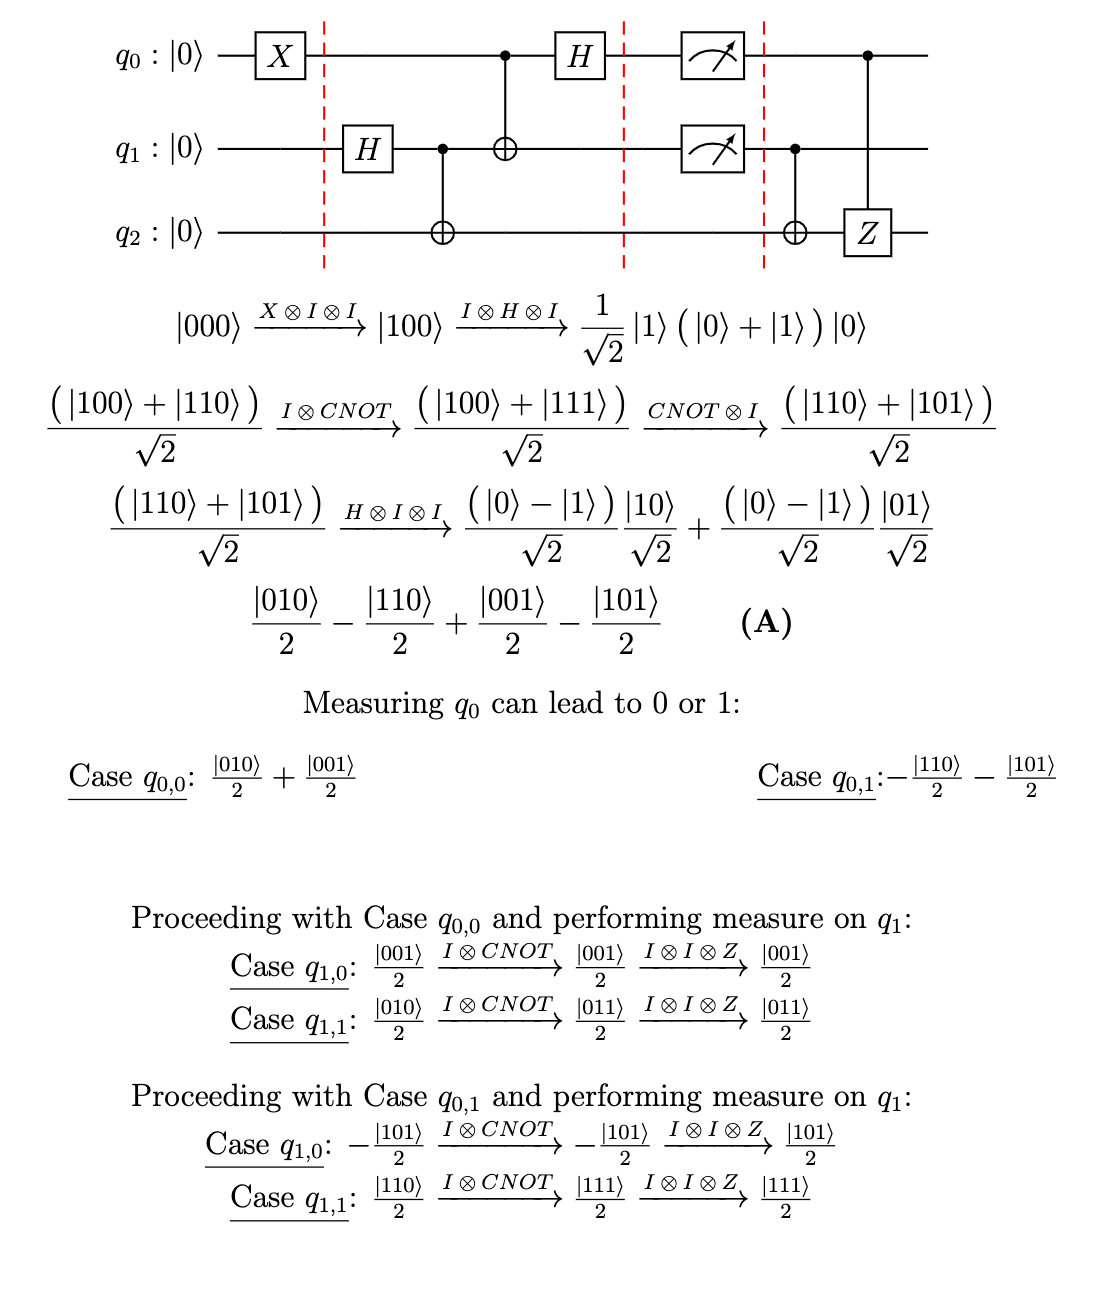

In [2]:
from IPython.display import Image
Image("Docs/Check-Tutorial1.png")

In [89]:
print(150+131+108+134)
print(127+119+113+142)

523
501


We will attempt to teleport the $\frac{1}{\sqrt{2}}\big(0+1\big)$ state from $q_{0}$ to $q_{2}$